# Практическая работа №3. Обнаружение вредоносного программного обеспечения.

Выполнили студенты ББМО-01-23:

- Благоразумов Александр Сергеевич
- Морин Алексей Александрович
- Сердюков Матвей Романович

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

## Загрузка датасета

In [2]:
dataset_path = './bodmas.npz'

df = np.load(dataset_path)
X = df['X']
y = df['y']

print(X.shape, y.shape)

(134435, 2381) (134435,)


In [26]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134435 entries, 0 to 134434
Columns: 2381 entries, 0 to 2380
dtypes: float32(2381)
memory usage: 1.2 GB


## Распеределение классов в датасете

array([[<Axes: title={'center': '0'}>]], dtype=object)

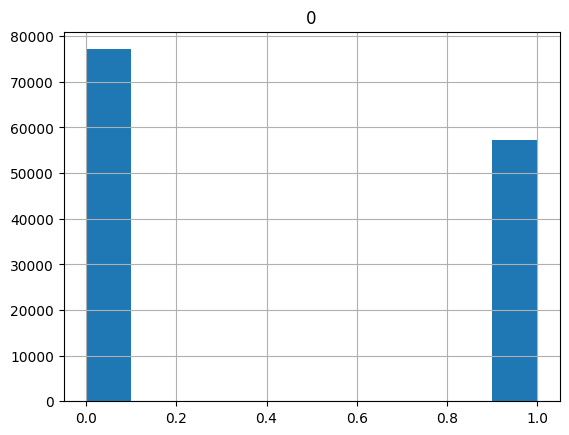

In [5]:
pd.DataFrame(y).hist()

## Удаление признаков, в которых все значения равны 0

In [27]:
cols_with_zeros = []

for col in df.columns:
    if df[col].std() == 0:
      cols_with_zeros.append(col)

df.drop(cols_with_zeros, axis=1, inplace=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df['Malware'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,2372,2373,2374,2375,2376,2377,2378,2379,2380,Malware
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0,0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0,0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1


## Сравнение образцов по первым 15 признакам

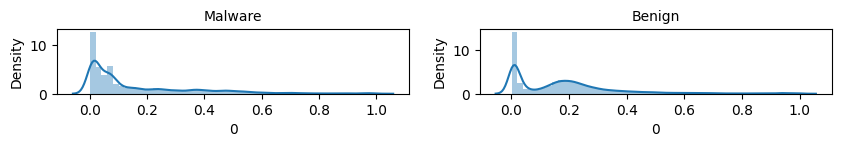

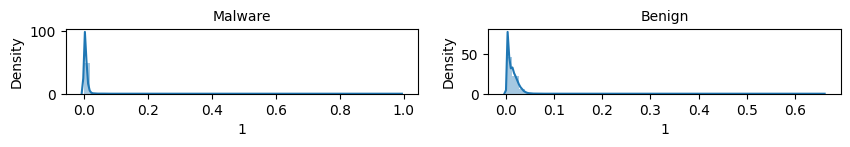

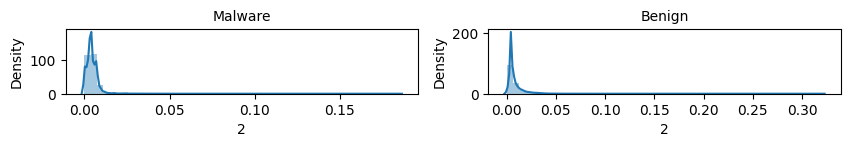

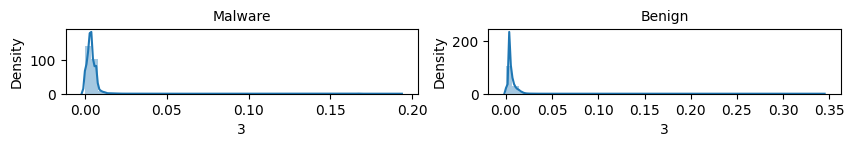

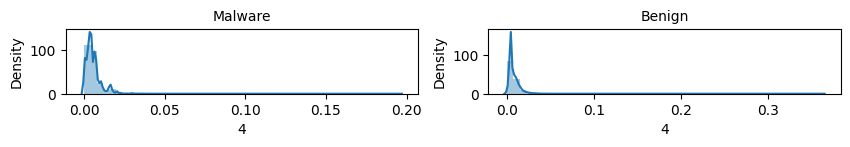

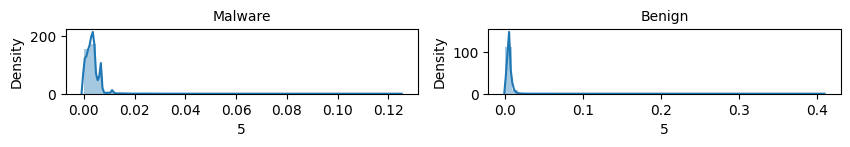

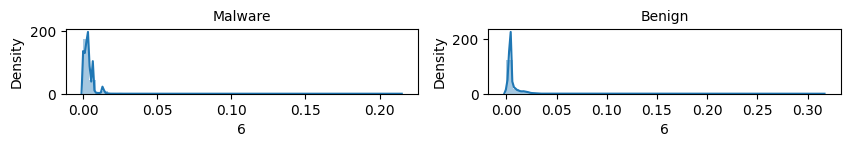

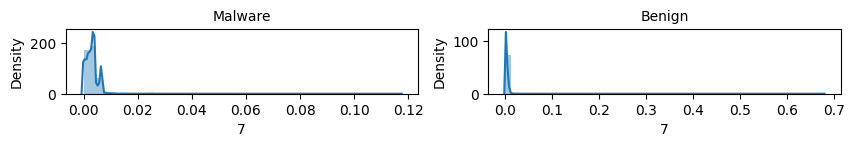

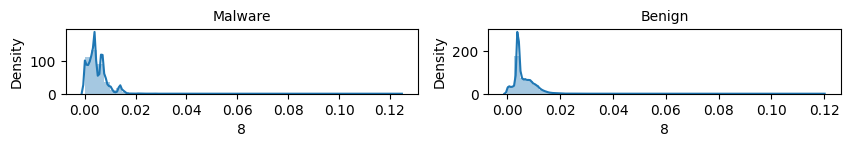

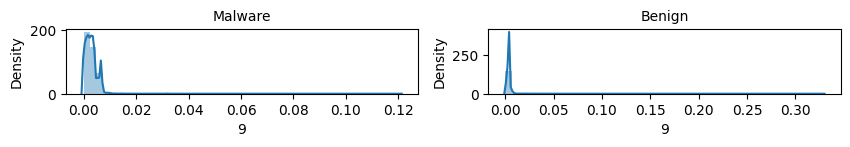

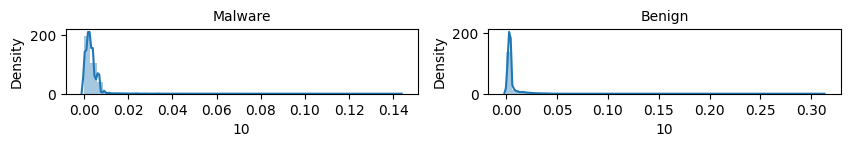

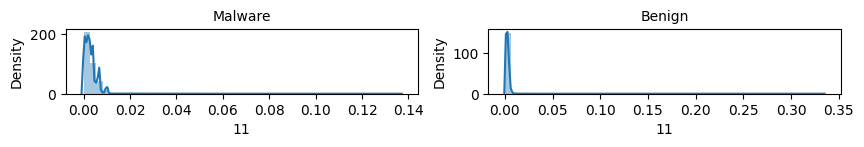

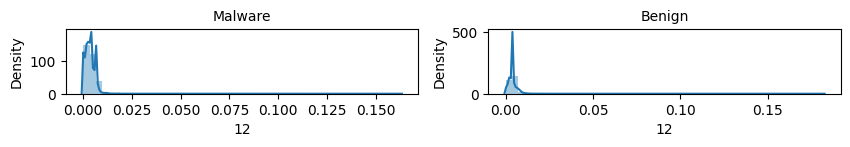

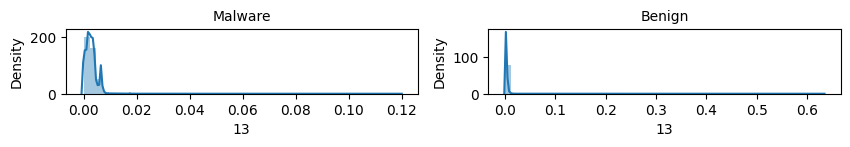

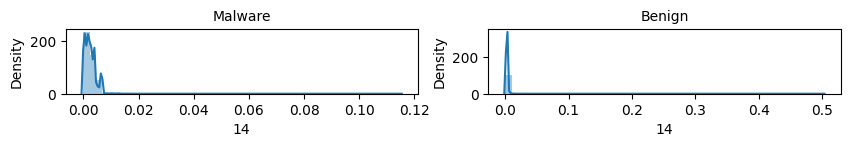

In [30]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


features = df.columns[:15]
i = 1

for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(df[df['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(df[df['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i= i+2

## Формирование обучающей и тестовой выборок

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Malware'], axis=1), df['Malware'], test_size=0.2, random_state=0)

print(f'Number of used features is {X_train.shape[1]}')

Number of used features is 2332


## Создание и обучение модели

In [36]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)

X_train.columns = X_train.columns.astype(str)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

## Проверка модели на тестовых данных

In [37]:
X_test.columns = X_test.columns.astype(str)
y_pred = rfc.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99     15375
     Malware       1.00      0.99      0.99     11512

    accuracy                           0.99     26887
   macro avg       0.99      0.99      0.99     26887
weighted avg       0.99      0.99      0.99     26887



Text(50.722222222222214, 0.5, 'True labels')

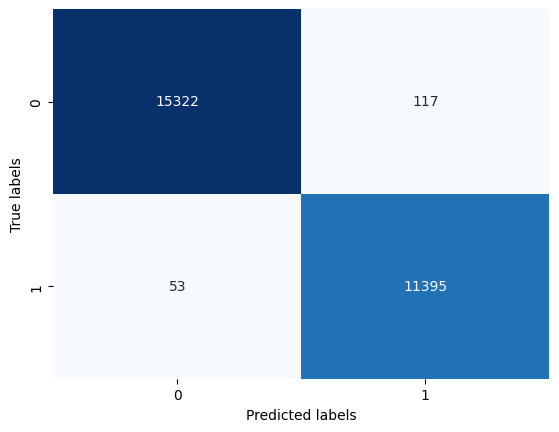

In [39]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [40]:
# Saving model

# pkl_filename = "rf_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(rfc, file)

/tmp/ipykernel_5444/4135027887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


Text(0.5, 1.0, 'Features importance')

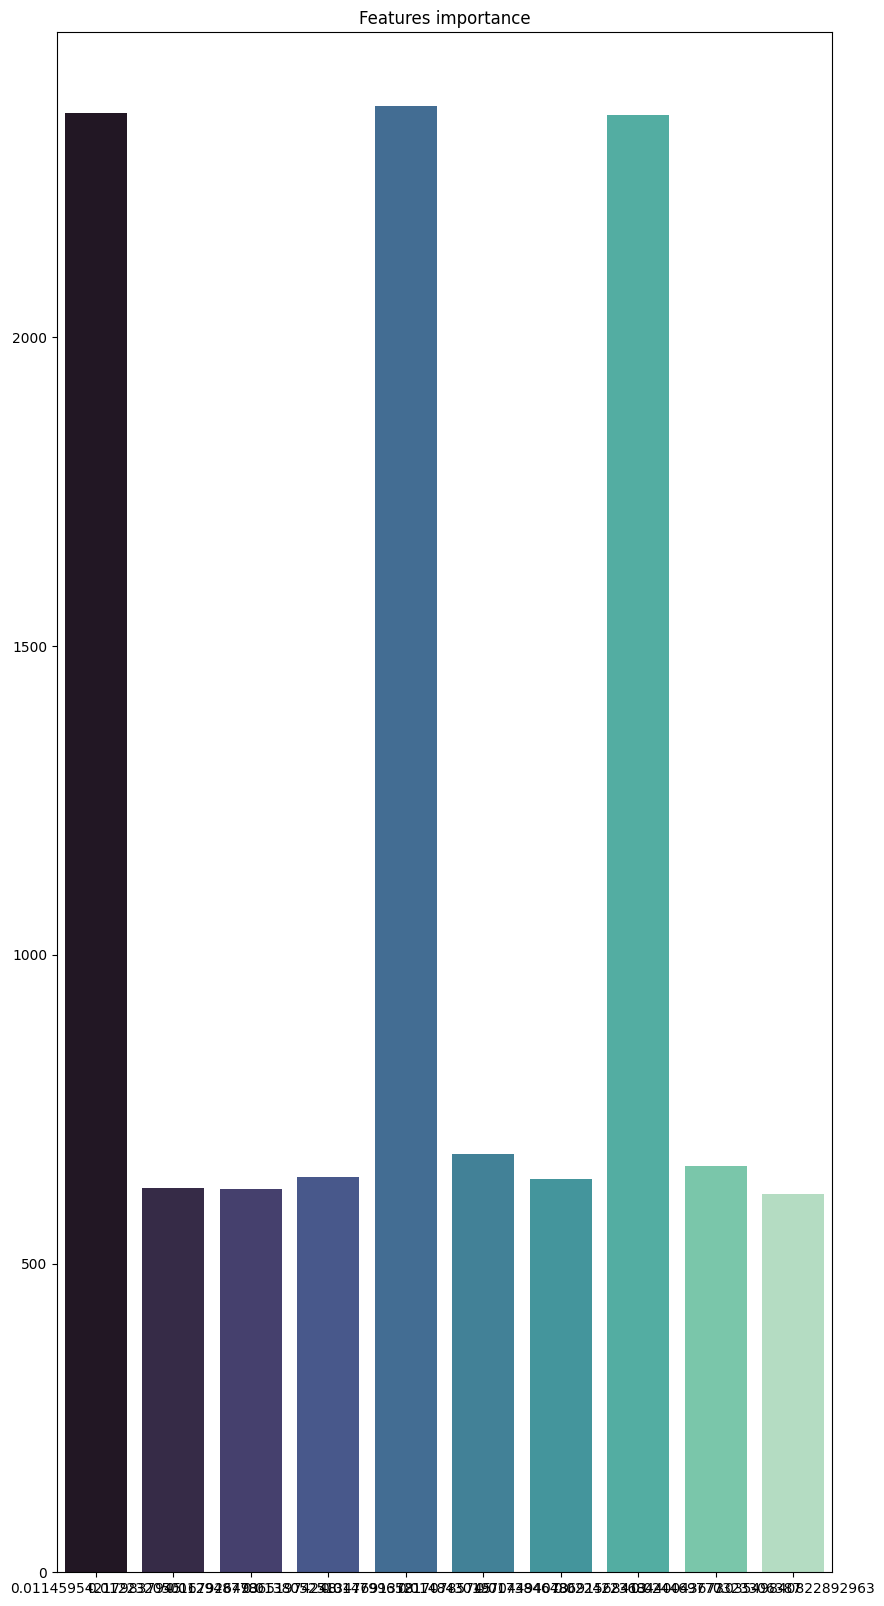

In [43]:
importance = rfc.feature_importances_
importance_dict = {df.drop(['Malware'], axis=1).columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])[-10:]}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')